In [48]:
#  Data Preparation
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [50]:
print("Shape of data: ", data.shape)

Shape of data:  (10000, 12)


In [51]:
# Data Visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=data['age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=data['age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of  Ages")
fig.show()

#Correlation

In [61]:
import seaborn as sns

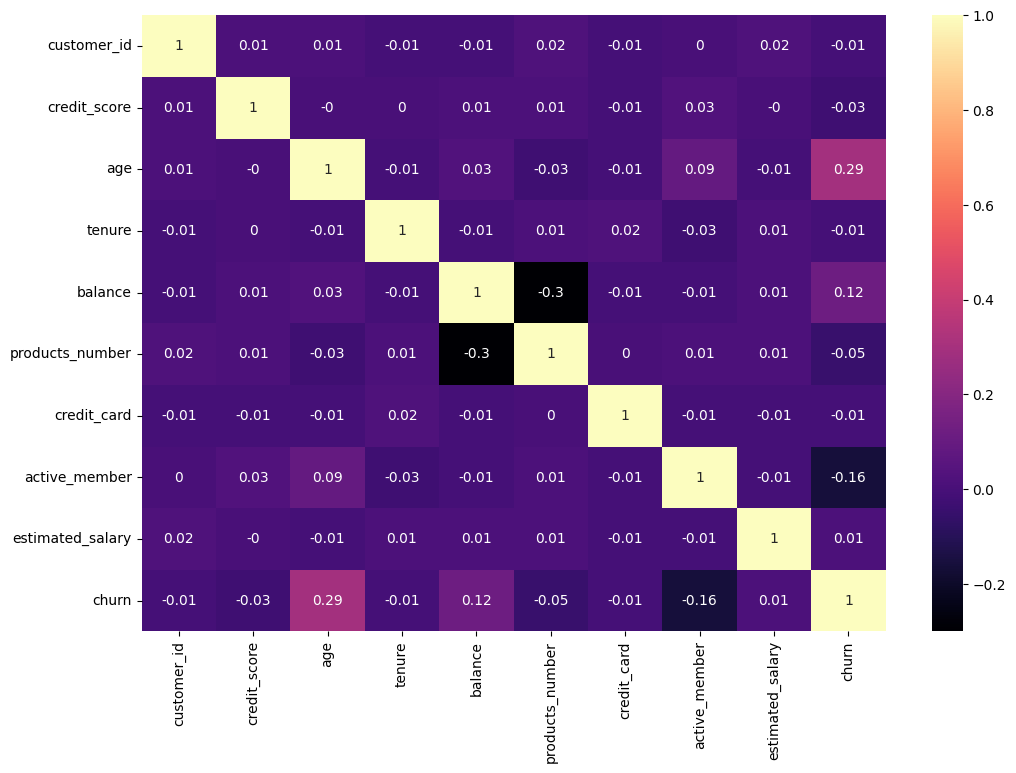

In [62]:
c_map=sns.color_palette("magma", as_cmap=True)
    # c_map color map sns ในตัวอย่างใช้ magma
d_correlation = data.corr(numeric_only=True).round(2)
    # d_correlation บงบอกชุดข้อมูลที่จะนำมาหา cor
        # numeric_only=True = ตัวเลขเท่านั้น
plt.figure(figsize = (12,8))
    # ขนาด12*8นิ้ว
sns.heatmap(d_correlation, annot = True, cmap = c_map)
plt.show()

In [52]:
df = data[['age','churn']]
df.head(2)

,age,churn
0,42,1
1,41,0


In [53]:
# ML
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop('churn',axis=1)
Y = df['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(f'X_train data size: {X_train.shape}')
print(f'Y_train data size: {Y_train.shape} \n')

print(f'X_test data size : {X_test.shape}')
print(f'Y_test data size : {Y_test.shape} \n')

X_train data size: (8000, 1)
Y_train data size: (8000,) 

X_test data size : (2000, 1)
Y_test data size : (2000,) 



In [55]:
# วิธีเช็ค categorical column
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: []


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [57]:

# Train DecisionTreeClassifier Model (Changed from RandomForestRegressor)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

# Test Model
pred = model.predict(X_test)

# Set a threshold (e.g., 0.5) to convert predicted probabilities to binary predictions
threshold = 0.5

# Convert predicted probabilities to binary predictions
Y_pred = (pred > threshold).astype(int)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.8105
Precision: 0.55
Recall: 0.19592875318066158
F1-score: 0.28893058161350843


In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

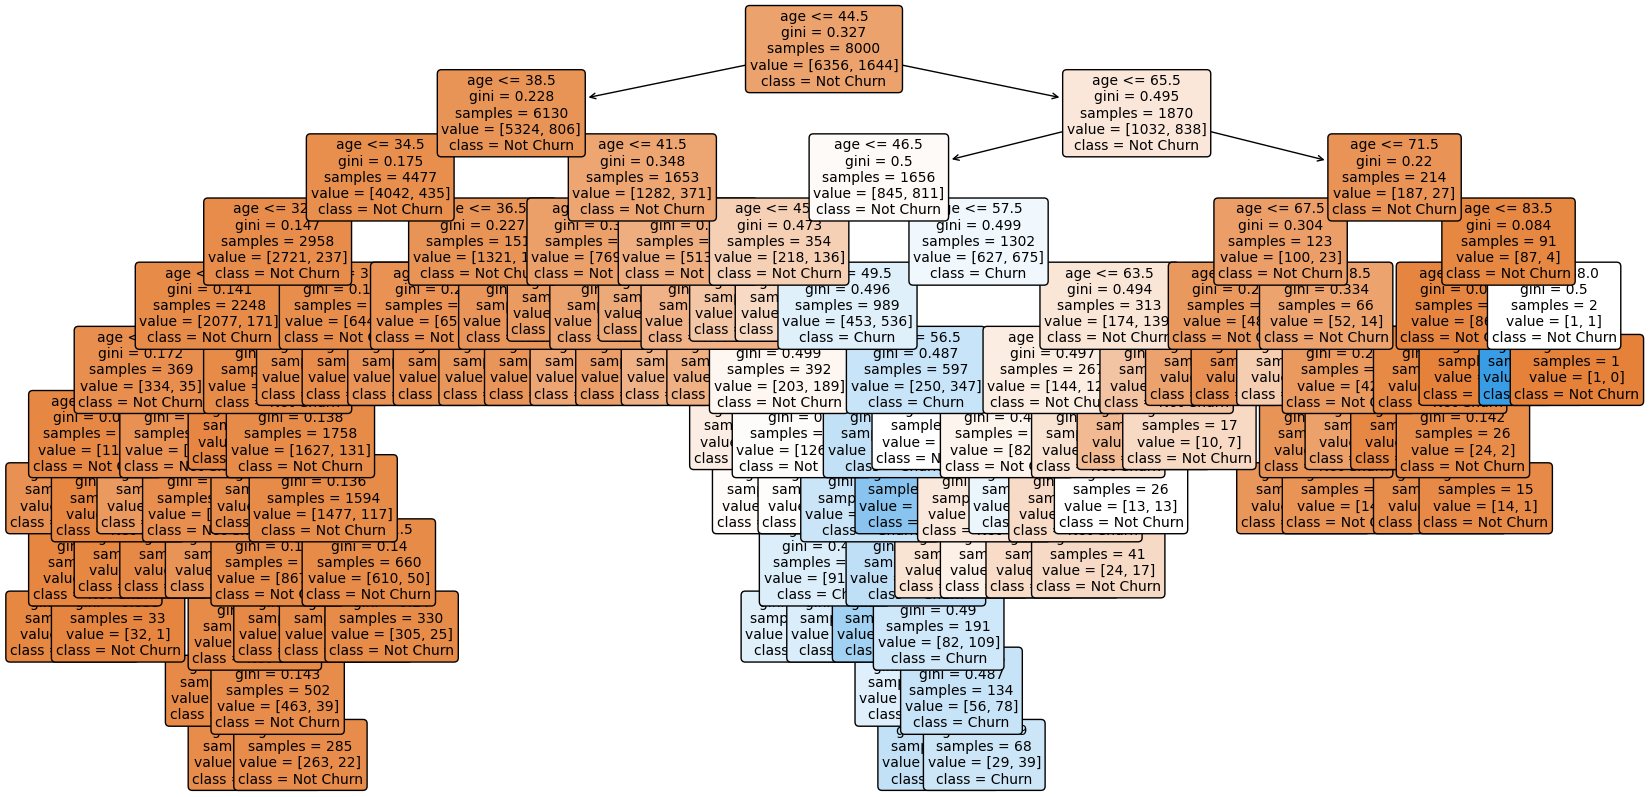

In [59]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Not Churn', 'Churn'], rounded=True, fontsize=10)
plt.show()